<a href="https://colab.research.google.com/github/pravanjangarg20/demo1/blob/main/54_Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
#!pip install nlp_utils

In [ ]:
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Loadind and Analysing DataSet

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df.shape

(20800, 5)

In [ ]:
pd.set_option('display.max_colwidth',1)

In [ ]:
df['title']

,title
0,House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart"
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Have Been Identified
4,Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
...,...
20795,Rapper T.I.: Trump a ’Poster Child For White Supremacy’
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times"
20797,Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times
20798,"NATO, Russia To Hold Parallel Exercises In Balkans"


In [ ]:
df['text']

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, "The FBI has learned of the existence of emails that appear to be pertinent to the investigation." Case reopened \n— Jason Chaffetz (@jasoninthehouse) October 28, 2016 \nOf course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of “an unrelated case”–which we now know to be Anthony Weiner’s sexting with a teenager. But apparently such little things as facts didn’t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary wins–at least two years’ worth, and possibly an entire term’s worth of them. Apparently Chaffetz thought the FBI was already doing his work for him–resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. \nBut according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetz’ sins. That aide told Shareblue that his boss and other Democrats didn’t even know about Comey’s letter at the time–and only found out when they checked Twitter. “Democratic Ranking Members on the relevant committees didn’t receive Comey’s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didn’ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.” \nSo let’s see if we’ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. \nThere has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. \nWhat it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didn’t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesn’t trample on basic standards of fairness, I don’t know what does. \nGranted, it’s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Re

In [ ]:
df['label'].value_counts()

,count
label,
1,10413
0,10387


In [ ]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
import re
import string

#Text Cleaning

## Removing Alphanumeric, Punchuation, Lowering the word

In [ ]:
alphanumeric= lambda x: re.sub('\w*\d\w*'," ",x)
punc_lower= lambda x: re.sub('[%s]' %re.escape(string.punctuation)," ",x.lower())
remove_n= lambda x: re.sub('\n'," ",x)
remove_non_ascii=lambda x:re.sub(r'[^\x00-\x7f]',r" ",x)

df['text']=df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

<ipython-input-16-7277e090c952>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [ ]:
df['text']

0        house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october      subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information  not long after this letter went out  oversight committee chairman jason chaffetz set the political world ablaze with this tweet  fbi dir just informed me   the fbi has learned of the existence of emails that appear to be pertinent to the investigation   case reopened    jason chaffetz   jasoninthehouse  october       of course  we now know that this was not the case   comey was actually saying that it was reviewing the emails in light of  an unrelated case  which we now know to be anthony weiner s sexting with a teenager  but apparently such little things as facts didn t matter to chaffetz  the utah republican had already vowed to initiate a raft of investigations if hillary wins at least two years  worth  and possibly an entire term s worth of them  apparently chaffetz thought the fbi was already doing his work for him resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud   but according to a senior house democratic aide  misreading that letter may have been the least of chaffetz  sins  that aide told shareblue that his boss and other democrats didn t even know about comey s letter at the time and only found out when they checked twitter   democratic ranking members on the relevant committees didn t receive comey s letter until after the republican chairmen  in fact  the democratic ranking members didn  receive it until after the chairman of the oversight and government reform committee  jason chaffetz  tweeted it out and made it public    so let s see if we ve got this right  the fbi director tells chaffetz and other gop committee chairmen about a major development in a potentially politically explosive investigation  and neither chaffetz nor his other colleagues had the courtesy to let their democratic counterparts know about it  instead  according to this aide  he made them find out about it on twitter   there has already been talk on daily kos that comey himself provided advance notice of this letter to chaffetz and other republicans  giving them time to turn on the spin machine  that may make for good theater  but there is nothing so far that even suggests this is the case  after all  there is nothing so far that suggests that comey was anything other than grossly incompetent and tone deaf   what it does suggest  however  is that chaffetz is acting in a way that makes dan burton and darrell issa look like models of responsibility and bipartisanship  he didn t even have the decency to notify ranking member elijah cummings about something this explosive  if that doesn t trample on basic standards of fairness  i don t know what does   granted  it s not likely that chaffetz will have to answer for this  he sits in a ridiculously republican district anchored in provo and orem  it has a cook partisan voting index of r    and gave mitt romney a punishing   percent of the vote in    moreover  the republican house leaders

##Removing Stopwords and stemming the text


In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df)):
  review=re.sub('[^a-zA-Z]'," ",df['text'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

##Splitting the DataFrame

In [ ]:
Y=df['label']
Y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.30, random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(12799,) (5486,) (12799,) (5486,)


#tfdif vectorizer

In [41]:
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

# Count Vectorizer

In [42]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

#Machine Learning Model

##1. Naive Bayes Model

### TFIDF Vectorize DataSet

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [44]:
clf = MultinomialNB()
clf.fit(tfidf_train, Y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.772
[[3103    8]
 [1243 1132]]


In [45]:

print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
1251 / 5486
Percentage accuracy:  77.19650018228216


#### Plotting confusion matrix for TF-Idf vectorizer

<Axes: >

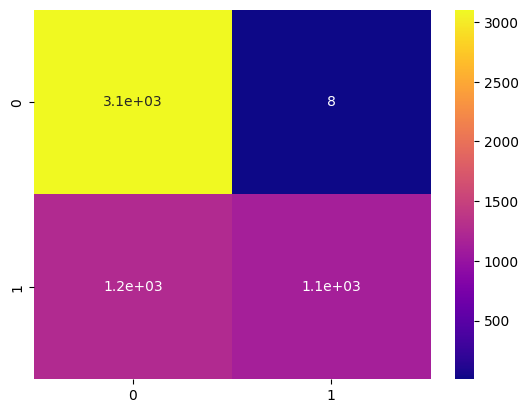

In [46]:
sns.heatmap(cm, cmap="plasma", annot=True)

### Count Vectorized DateSet

In [49]:
clf = MultinomialNB()
clf.fit(count_train, Y_train)
pred1 = clf.predict(count_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.903
[[2977  134]
 [ 397 1978]]


In [50]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
531 / 5486
Percentage accuracy:  90.32081662413415


#### Plotting confusion matrix for Count vectorizer.

<Axes: >

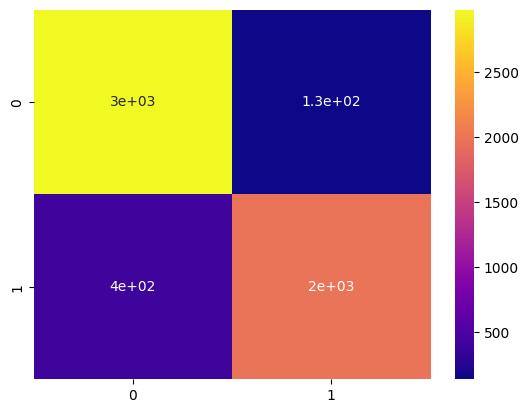

In [51]:
sns.heatmap(cm2, cmap="plasma", annot=True)

## 2. Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized DateSet

In [53]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
train_preds2 = RF.predict(tfidf_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

Model accuracy on train is:  0.9999218688960075


In [54]:
test_preds2 = RF.predict(tfidf_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

Model accuracy on test is:  0.9134159679183376
--------------------------------------------------


In [55]:
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3058   53]
 [ 422 1953]]
Wrong predictions out of total
--------------------------------------------------


In [56]:
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

475 / 5486
--------------------------------------------------


### Count Vectorized

In [57]:
RF=RandomForestClassifier().fit(count_train,Y_train)
train_preds3 = RF.predict(count_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.8975574188844331
--------------------------------------------------
confusion_matrix train is:  [[7249    1]
 [   0 5549]]
confusion_matrix test is:  [[3032   79]
 [ 483 1892]]
Wrong predictions out of total
--------------------------------------------------


In [58]:
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

562 / 5486
--------------------------------------------------


##3. K-Nearest Neighbour

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)

### TFIDF Vectorized DataSet

In [60]:
train_preds4 = KNN.predict(tfidf_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

Model accuracy on train is:  0.5187123994062036


In [61]:
test_preds4 = KNN.predict(tfidf_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on test is:  0.48651111921254103
--------------------------------------------------


In [72]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds4))


confusion_matrix train is:  [[1106 6144]
 [  16 5533]]
confusion_matrix test is:  [[ 304 2807]
 [  10 2365]]


In [71]:
# Wrong Predictions made.

print('Wrong predictions out of total')
print('-'*50)
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

Wrong predictions out of total
--------------------------------------------------
2817 / 5486
--------------------------------------------------


### Count Vectorized DataSet

In [64]:
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.7850613329166342
Model accuracy on test is:  0.7320452059788553
--------------------------------------------------


In [73]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds5))


confusion_matrix train is:  [[4680 2570]
 [ 181 5368]]
confusion_matrix test is:  [[1770 1341]
 [ 129 2246]]


In [74]:
# Wrong Predictions made.
print('Wrong predictions out of total')
print('-'*50)
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

Wrong predictions out of total
--------------------------------------------------
1470 / 5486
--------------------------------------------------
